In [1]:
import numpy as np
import matplotlib.pyplot as pp
import GEeASL_functions as easl
import scipy.io as sio
import pandas as pd

In [2]:
# Oxford_asl: Simualtion
rootdir = '/Users/xinzhang/Downloads/optpcasl_cic_GEeASL/'
params7 = easl.set_params(mode='rand')
specification7 = 'GEeASL7-rand'
easl.run_simulation(rootdir,params7,specification7)

Simulating protocol GEeASL7-CV4-4.0-CV5-4.0-CV7-1.0 ( 4860 of 4860 ) ...
************  Simulation Process: 100.00%  ************
Simulation complete!


In [3]:
# Oxford_asl: Collection
params7 = easl.set_params(mode='rand')
estdir7 = '/Users/xinzhang/Downloads/optpcasl_cic_GEeASL/sim_20220620_GEeASL7-rand/'
est7_oxford_asl = easl.get_estimation_oxford_asl(estdir7,params7)
sio.savemat(estdir7+'est_oxford_asl.mat',est7_oxford_asl)
est7_avg_oxford_asl = easl.get_estimation_avg_oxford_asl(estdir7,params7,est7_oxford_asl)
sio.savemat(estdir7+'est_avg_oxford_asl.mat',est7_avg_oxford_asl)

***************  Process: 100.00%  ***************


In [6]:
# Add collected oxford_asl estimation results to csv file
df_oxford_asl_CBFerr_mean = []
df_oxford_asl_CBFerr_sd = []
df_oxford_asl_ATTerr_mean = []
df_oxford_asl_ATTerr_sd = []
df_oxford_asl_CBFabserr_mean = []
df_oxford_asl_CBFabserr_sd = []
df_oxford_asl_ATTabserr_mean = []
df_oxford_asl_ATTabserr_sd = []
df7_nSamp20 = pd.read_csv('data/GEeASL7_protocol_properties_nSamp20.csv')
df7_nSamp30 = pd.read_csv('data/GEeASL7_protocol_properties_nSamp30.csv')
df7_nSamp40 = pd.read_csv('data/GEeASL7_protocol_properties_nSamp40.csv')
for i in range(len(df7_nSamp20['isFitBlock'])):
    if df7_nSamp20['isFitBlock'][i]:
        df_oxford_asl_CBFerr_mean = np.append(df_oxford_asl_CBFerr_mean,est7_avg_oxford_asl[df7_nSamp20['name'][i]+'_nomvc_asl_gkm_cbferr_mean'])
        df_oxford_asl_CBFerr_sd = np.append(df_oxford_asl_CBFerr_sd,est7_avg_oxford_asl[df7_nSamp20['name'][i]+'_nomvc_asl_gkm_cbferr_sd'])
        df_oxford_asl_ATTerr_mean = np.append(df_oxford_asl_ATTerr_mean,est7_avg_oxford_asl[df7_nSamp20['name'][i]+'_nomvc_asl_gkm_atterr_mean'])
        df_oxford_asl_ATTerr_sd = np.append(df_oxford_asl_ATTerr_sd,est7_avg_oxford_asl[df7_nSamp20['name'][i]+'_nomvc_asl_gkm_atterr_sd'])
        df_oxford_asl_CBFabserr_mean = np.append(df_oxford_asl_CBFabserr_mean,est7_avg_oxford_asl[df7_nSamp20['name'][i]+'_nomvc_asl_gkm_cbfabserr_mean'])
        df_oxford_asl_CBFabserr_sd = np.append(df_oxford_asl_CBFabserr_sd,est7_avg_oxford_asl[df7_nSamp20['name'][i]+'_nomvc_asl_gkm_cbfabserr_sd'])
        df_oxford_asl_ATTabserr_mean = np.append(df_oxford_asl_ATTabserr_mean,est7_avg_oxford_asl[df7_nSamp20['name'][i]+'_nomvc_asl_gkm_attabserr_mean'])
        df_oxford_asl_ATTabserr_sd = np.append(df_oxford_asl_ATTabserr_sd,est7_avg_oxford_asl[df7_nSamp20['name'][i]+'_nomvc_asl_gkm_attabserr_sd'])
    else: 
        df_oxford_asl_CBFerr_mean = np.append(df_oxford_asl_CBFerr_mean,np.nan)
        df_oxford_asl_CBFerr_sd = np.append(df_oxford_asl_CBFerr_sd,np.nan)
        df_oxford_asl_ATTerr_mean = np.append(df_oxford_asl_ATTerr_mean,np.nan)
        df_oxford_asl_ATTerr_sd = np.append(df_oxford_asl_ATTerr_sd,np.nan)
        df_oxford_asl_CBFabserr_mean = np.append(df_oxford_asl_CBFabserr_mean,np.nan)
        df_oxford_asl_CBFabserr_sd = np.append(df_oxford_asl_CBFabserr_sd,np.nan)
        df_oxford_asl_ATTabserr_mean = np.append(df_oxford_asl_ATTabserr_mean,np.nan)
        df_oxford_asl_ATTabserr_sd = np.append(df_oxford_asl_ATTabserr_sd,np.nan)
protocol_oxford_asl_properties = {'oxford_asl_CBFerr_mean (%)':df_oxford_asl_CBFerr_mean,
                                  'oxford_asl_CBFerr_sd (%)':df_oxford_asl_CBFerr_sd,
                                  'oxford_asl_ATTerr_mean (%)':df_oxford_asl_ATTerr_mean,
                                  'oxford_asl_ATTerr_sd (%)':df_oxford_asl_ATTerr_sd,
                                  'oxford_asl_CBFabserr_mean (%)':df_oxford_asl_CBFabserr_mean,
                                  'oxford_asl_CBFabserr_sd (%)':df_oxford_asl_CBFabserr_sd,
                                  'oxford_asl_ATTabserr_mean (%)':df_oxford_asl_ATTabserr_mean,
                                  'oxford_asl_ATTabserr_sd (%)':df_oxford_asl_ATTabserr_sd}
df_protocol_oxford_asl_properties = pd.DataFrame(protocol_oxford_asl_properties)
df7_nSamp20 = pd.concat([df7_nSamp20,df_protocol_oxford_asl_properties],axis=1)
df7_nSamp30 = pd.concat([df7_nSamp30,df_protocol_oxford_asl_properties],axis=1)
df7_nSamp40 = pd.concat([df7_nSamp40,df_protocol_oxford_asl_properties],axis=1)
df7_nSamp20.to_csv('data/GEeASL7_protocol_properties_nSamp20.csv')
df7_nSamp30.to_csv('data/GEeASL7_protocol_properties_nSamp30.csv')
df7_nSamp40.to_csv('data/GEeASL7_protocol_properties_nSamp40.csv')

In [2]:
protocol = easl.set_protocol(numdelay=7,minPLD=0.7,totalLD=3.5,delaylin=0)
print(protocol['LDs'])
print(protocol['TIs'])

[1.183 0.682 0.481 0.372 0.303 0.256 0.222]
[4.199 3.016 2.334 1.853 1.481 1.178 0.922]


In [4]:
params7 = easl.set_params()
df_protocol7_properties = pd.read_csv('data/GEeASL7_protocol_properties_nSamp20.csv')
print(df_protocol7_properties.keys())

Index(['Unnamed: 0', 'Unnamed: 0.1', 'name', 'nDelays', 'minPLD (s)',
       'totalLD (s)', 'delaylin', 'readout (s)', 'scantime (s)', 'isFitBlock',
       'nRepeatIn1Block', 'idletime (s)', 'signalSqrtSum', 'wholeSNR', 'tSNR',
       'nlls_CBFerr_mean (%)', 'nlls_CBFerr_sd (%)', 'nlls_ATTerr_mean (%)',
       'nlls_ATTerr_sd (%)', 'nlls_CBFabserr_mean (%)',
       'nlls_CBFabserr_sd (%)', 'nlls_ATTabserr_mean (%)',
       'nlls_ATTabserr_sd (%)', 'oxford_asl_CBFerr_mean (%)',
       'oxford_asl_CBFerr_sd (%)', 'oxford_asl_ATTerr_mean (%)',
       'oxford_asl_ATTerr_sd (%)', 'oxford_asl_CBFabserr_mean (%)',
       'oxford_asl_CBFabserr_sd (%)', 'oxford_asl_ATTabserr_mean (%)',
       'oxford_asl_ATTabserr_sd (%)'],
      dtype='object')


In [5]:
fxyz = np.reshape(df_protocol7_properties['nlls_ATTabserr_mean (%)'].to_list(),
                  (len(params7['minPLDs']),len(params7['totalLDs']),len(params7['delaylins'])))
xarray = params7['minPLDs']; yarray = params7['totalLDs']; zarray = params7['delaylins']
titles_list = ['minPLD','totalLD','delaylin']
findlb = [0.7,2.0,0.0]; findub = [4.0,4.0,1.0]
fig = easl.visualise_3d(xarray,yarray,zarray,fxyz,titles_list,findmax=True,findmin=True,findlb=findlb,findub=findub)
fig.show()

The search boundary is minPLD: 0.7 to 4.0, totalLD: 2.0 to 4.0, delaylin: 0.0 to 1.0
The max value is 50.46, appearing at minPLD = 1.6, totalLD = 2.1, delaylin = 0.8
The min value is 17.46, appearing at minPLD = 0.7, totalLD = 3.5, delaylin = 0.8


<ipython-input-6-261516fef4e5>:17: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



<Figure size 432x288 with 0 Axes>

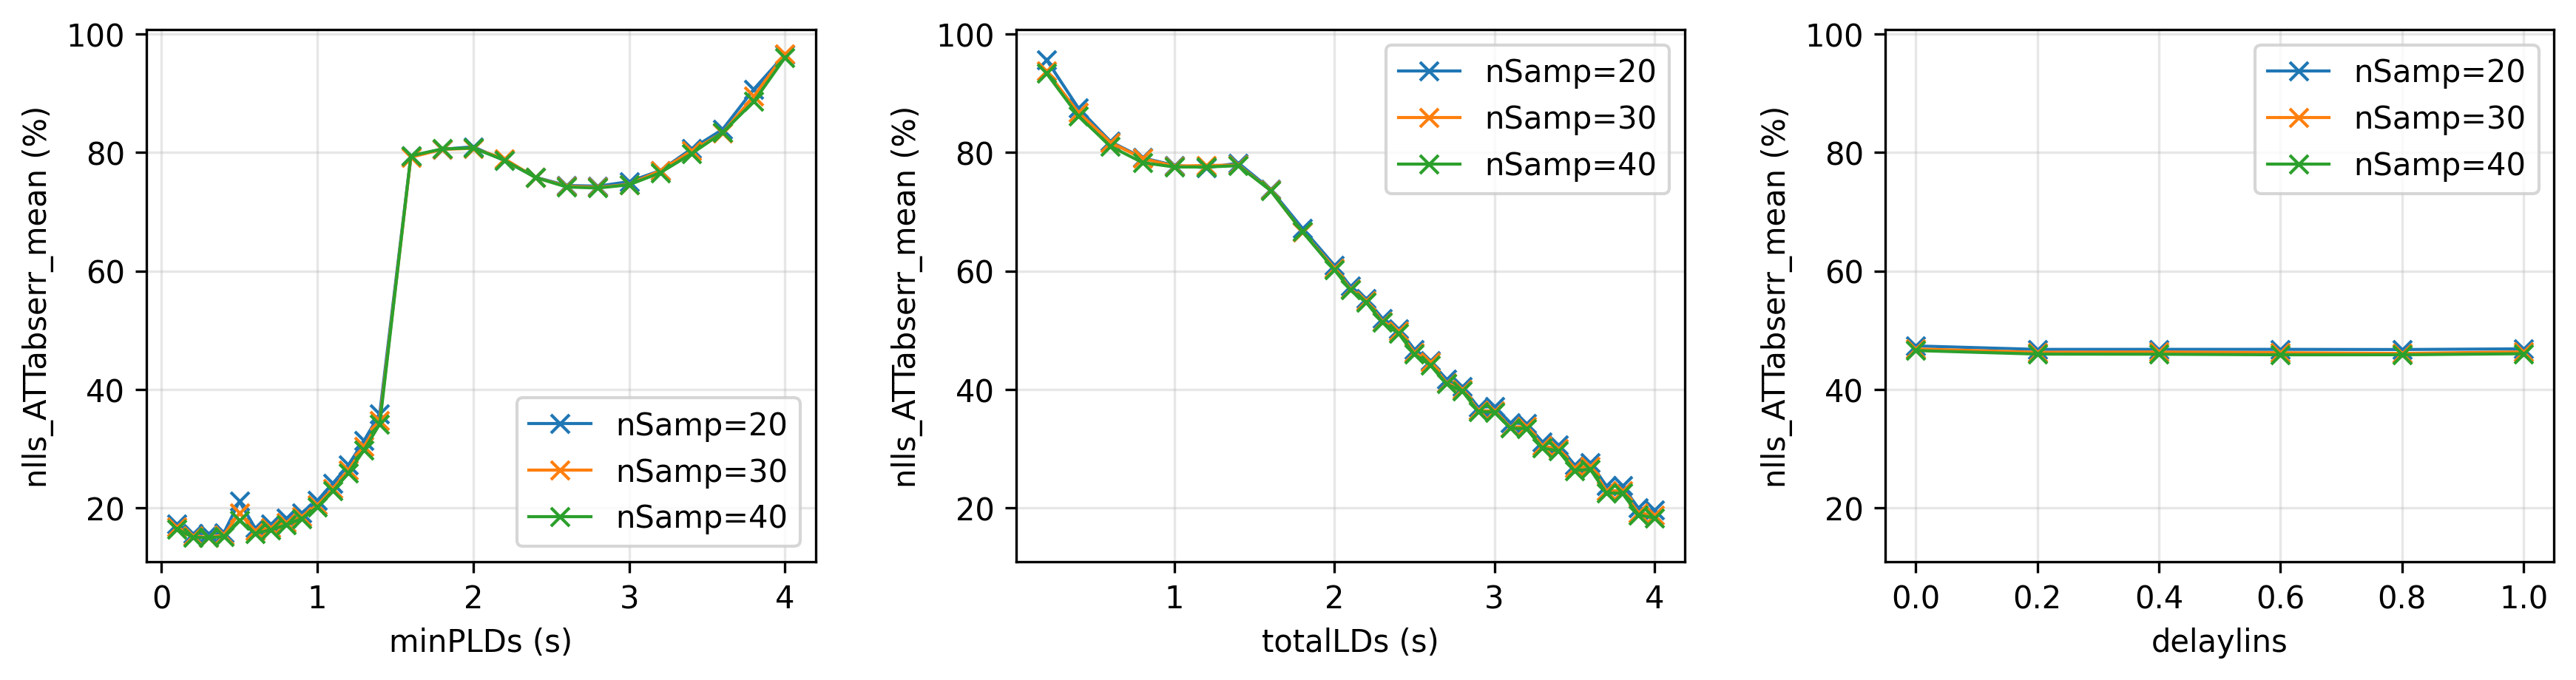

In [6]:
params3 = easl.set_params()
df3_nSamp20 = pd.read_csv('data/GEeASL3_protocol_properties_nSamp20.csv')
df3_nSamp30 = pd.read_csv('data/GEeASL3_protocol_properties_nSamp30.csv')
df3_nSamp40 = pd.read_csv('data/GEeASL3_protocol_properties_nSamp40.csv')
xarray = params3['minPLDs']; yarray = params3['totalLDs']; zarray = params3['delaylins']
fdiv = np.reshape(df3_nSamp20['isFitBlock'].to_list(),(len(xarray),len(yarray),len(zarray)))
propName = 'nlls_ATTabserr_mean (%)'
f_nSamp20 = np.reshape(df3_nSamp20[propName].to_list(),(len(xarray),len(yarray),len(zarray)))
f_nSamp30 = np.reshape(df3_nSamp30[propName].to_list(),(len(xarray),len(yarray),len(zarray)))
f_nSamp40 = np.reshape(df3_nSamp40[propName].to_list(),(len(xarray),len(yarray),len(zarray)))
fnxyz = [f_nSamp20,f_nSamp30,f_nSamp40]
xlabels_list = ['minPLDs (s)','totalLDs (s)','delaylins']
ylabel = propName
plotlabels_list = ['nSamp=20','nSamp=30','nSamp=40']
fig = easl.visualise_3d_projections(xarray,yarray,zarray,fnxyz,fdiv,
                                   xlabels_list,ylabel,plotlabels_list)
fig.show()

<ipython-input-12-0ca821f7cd0a>:17: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



<Figure size 1008x216 with 0 Axes>

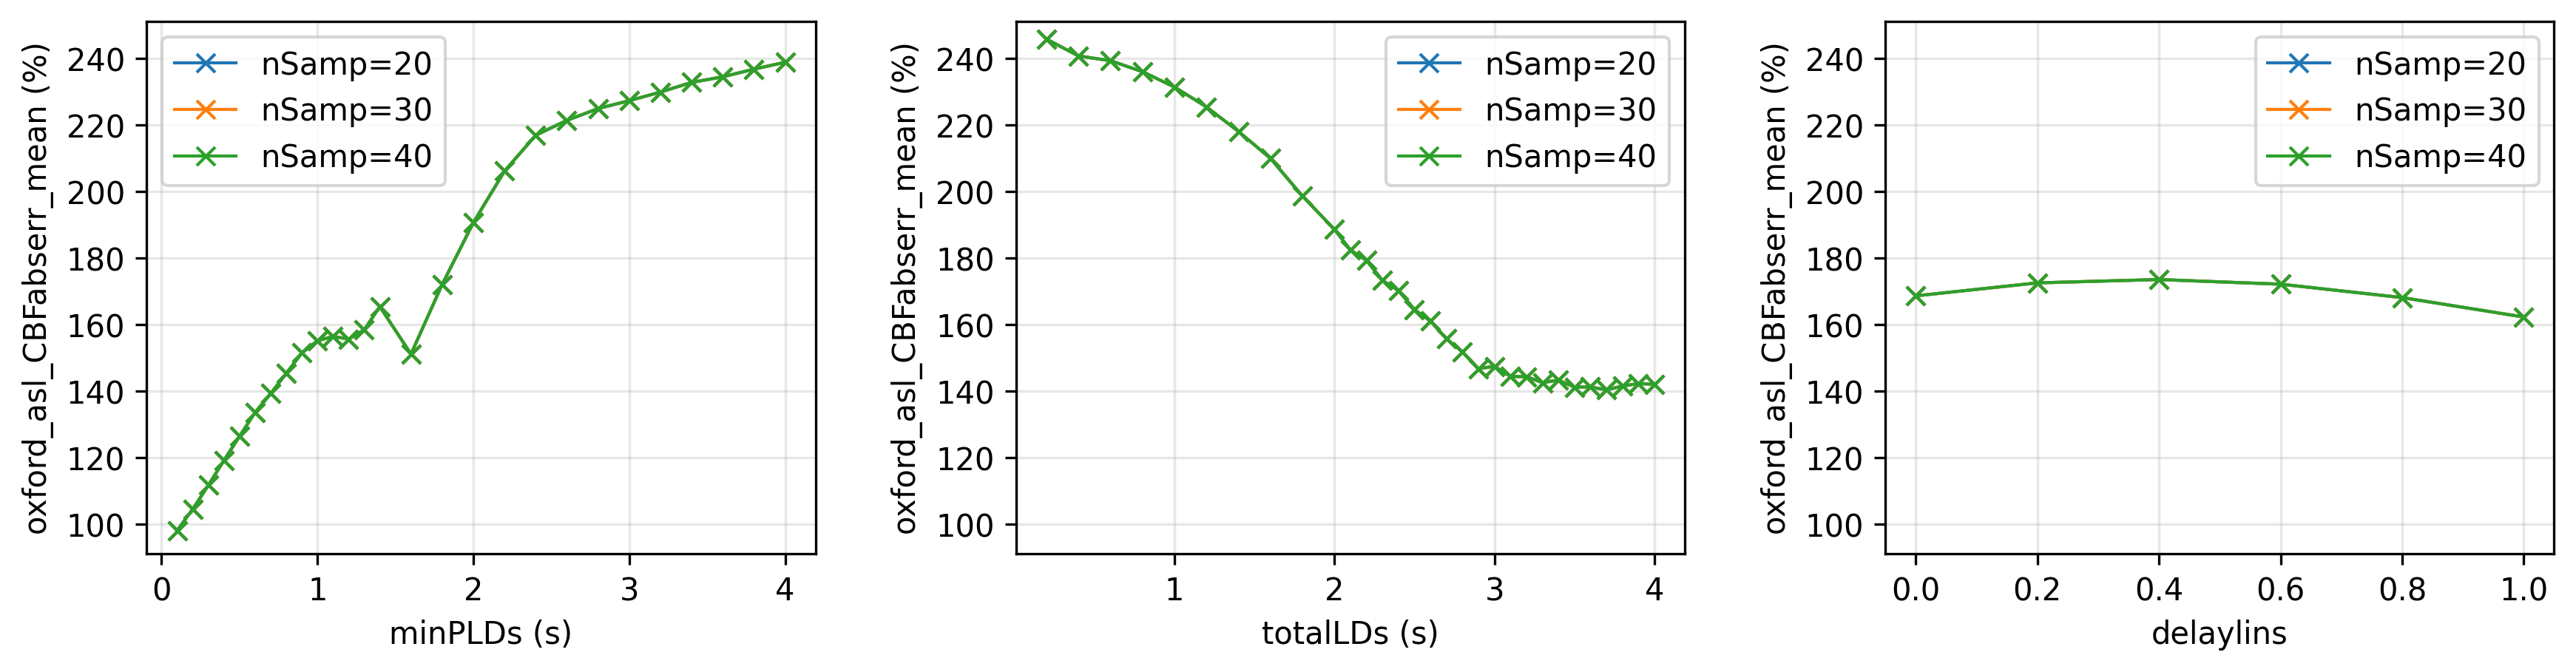

In [12]:
params7 = easl.set_params()
df7_nSamp20 = pd.read_csv('data/GEeASL7_protocol_properties_nSamp20.csv')
df7_nSamp30 = pd.read_csv('data/GEeASL7_protocol_properties_nSamp30.csv')
df7_nSamp40 = pd.read_csv('data/GEeASL7_protocol_properties_nSamp40.csv')
xarray = params7['minPLDs']; yarray = params7['totalLDs']; zarray = params7['delaylins']
fdiv = np.reshape(df7_nSamp20['isFitBlock'].to_list(),(len(xarray),len(yarray),len(zarray)))
propName = 'oxford_asl_CBFabserr_mean (%)'
f_nSamp20 = np.reshape(df7_nSamp20[propName].to_list(),(len(xarray),len(yarray),len(zarray)))
f_nSamp30 = np.reshape(df7_nSamp30[propName].to_list(),(len(xarray),len(yarray),len(zarray)))
f_nSamp40 = np.reshape(df7_nSamp40[propName].to_list(),(len(xarray),len(yarray),len(zarray)))
fnxyz = [f_nSamp20,f_nSamp30,f_nSamp40]
xlabels_list = ['minPLDs (s)','totalLDs (s)','delaylins']
ylabel = propName
plotlabels_list = ['nSamp=20','nSamp=30','nSamp=40']
fig = easl.visualise_3d_projections(xarray,yarray,zarray,fnxyz,fdiv,
                                   xlabels_list,ylabel,plotlabels_list)
fig.show()

/Users/xinzhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 1008x216 with 0 Axes>

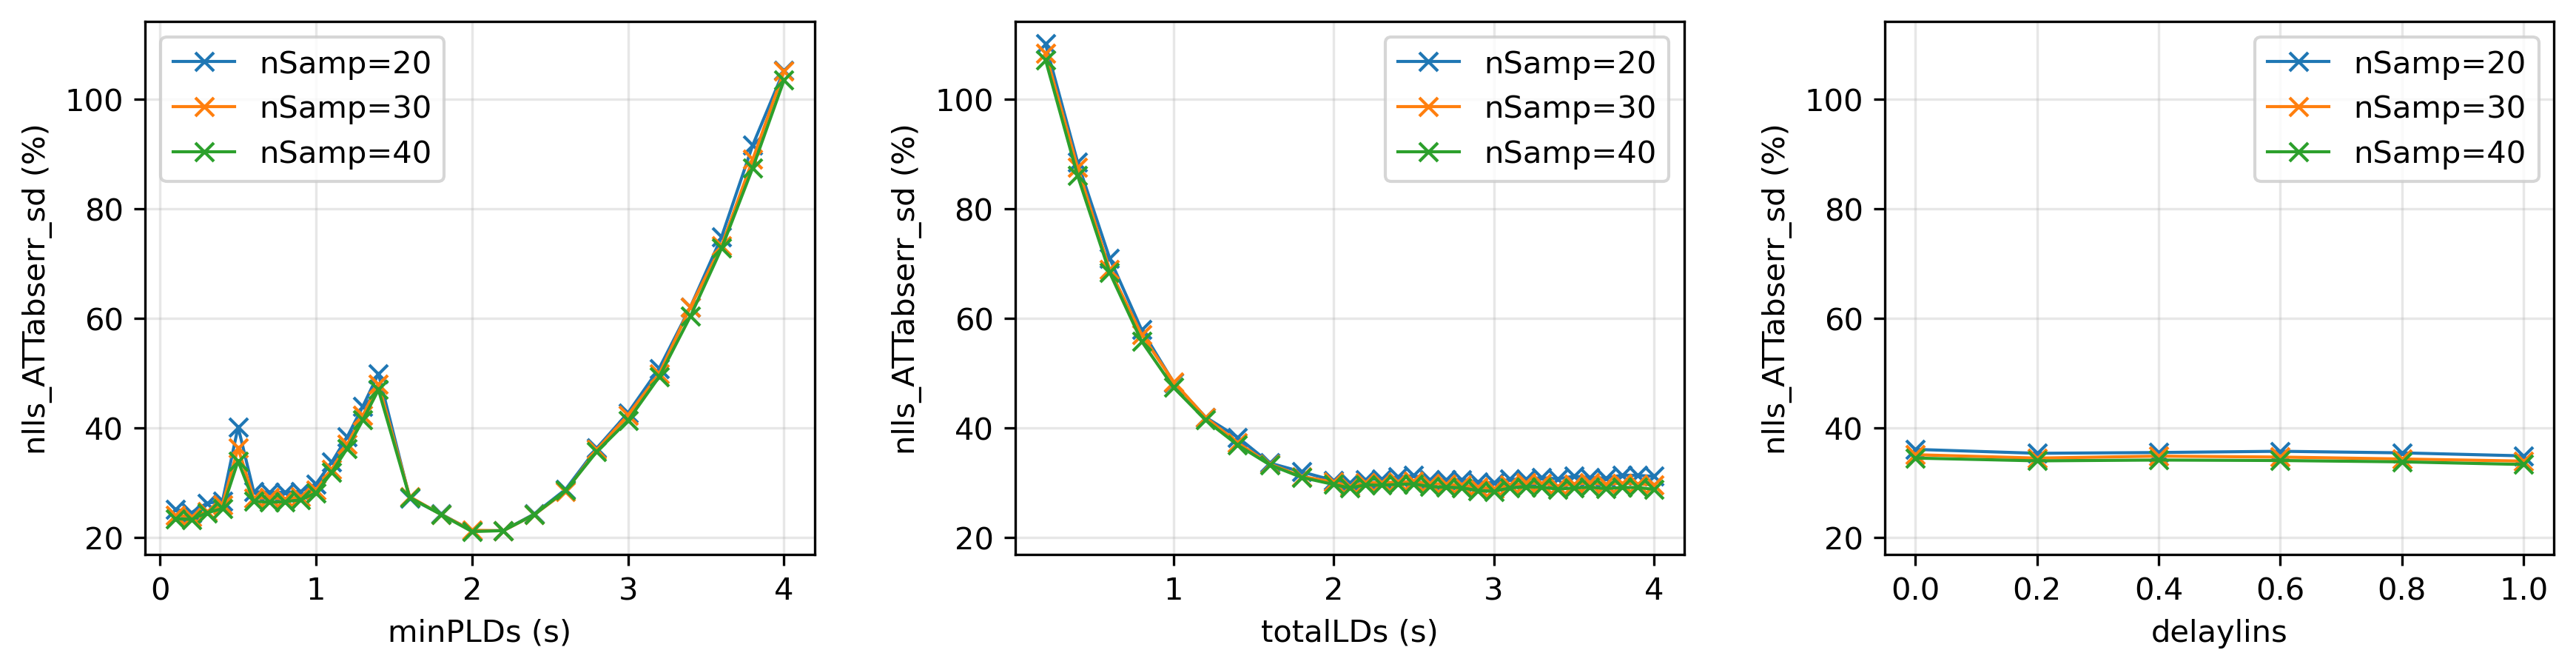